In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.path as mpath
from matplotlib import rc
import matplotlib.pyplot as plt
import netCDF4 as nc 
import pandas as pd 
import xarray as xr
import seaborn as sns
import scipy
from xgcm import Grid
import matplotlib.animation as animation
from IPython.display import HTML
import cmocean
from scipy.fft import fft, fftfreq
plt.rcParams.update({'font.size': 10})
from scipy import signal
import sys
import h5py
sys.path.append('./tools/')
##m6toolbox is a python package that has a function that helps visualize vertical sections
import m6toolbox
import m6plot
import cmasher as cmr
 # mpl.rcParams['animation.embed_limit'] = 2**128
print('all done')
%matplotlib inline
nanmasked = plt.get_cmap('turbo').copy()
nanmasked.set_bad('black')
nanmasked2 = plt.get_cmap('RdBu').copy()
nanmasked2.set_bad('black')

Basemap module not found. Some regional plots may not function properly
all done


In [2]:
from dask.distributed import Client
import dask
import os
client = Client()
client

/home/wc4720/.conda/envs/xdefault/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33533 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33533/status,
Dashboard: http://127.0.0.1:33533/status,Workers: 1
Total threads: 1,Total memory: 7.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34547,Workers: 0
Dashboard: http://127.0.0.1:33533/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:40705,Total threads: 1
Dashboard: http://127.0.0.1:46495/status,Memory: 7.81 GiB
Nanny: tcp://127.0.0.1:36233,


In [4]:
# data_path = '/scratch/gpfs/CDEUTSCH/wchu/CEFI-regional-MOM6/exps/NWA12.COBALT/OUTPUT/control/1997/19970101.ocean_static.nc'
# static = xr.open_dataset(data_path,chunks='auto')#chunks={'xq':300,'yq':100,'xh':300,'yh':100})
# static = static.isel(xh=slice(0,601),yh=slice(0,343),xq=slice(0,601),yq=slice(0,343))

ds = xr.open_mfdataset('/scratch/gpfs/CDEUTSCH/wchu/CEFI-regional-MOM6/exps/NWA12.COBALT/OUTPUT/control/**/*budgets*.nc',engine='h5netcdf',chunks='auto',combine='nested',concat_dim='time',decode_timedelta='CFTimedeltaCoder')

In [13]:
ds.zl[21]

<xarray.DataArray 'zl' ()>
array(49.88)
Coordinates:
    zl       float64 49.88
Attributes:
    units:      meter
    long_name:  Layer pseudo-depth, -z*
    axis:       Z
    positive:   down

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1940067/711174724.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='dissolved oxygen [$\mu$mol/kg]')
/tmp/ipykernel_1940067/711174724.py:20: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel('longitude [$\degree$E]')
/tmp/ipykernel_1940067/711174724.py:21: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('latitude [$\degree$N]')


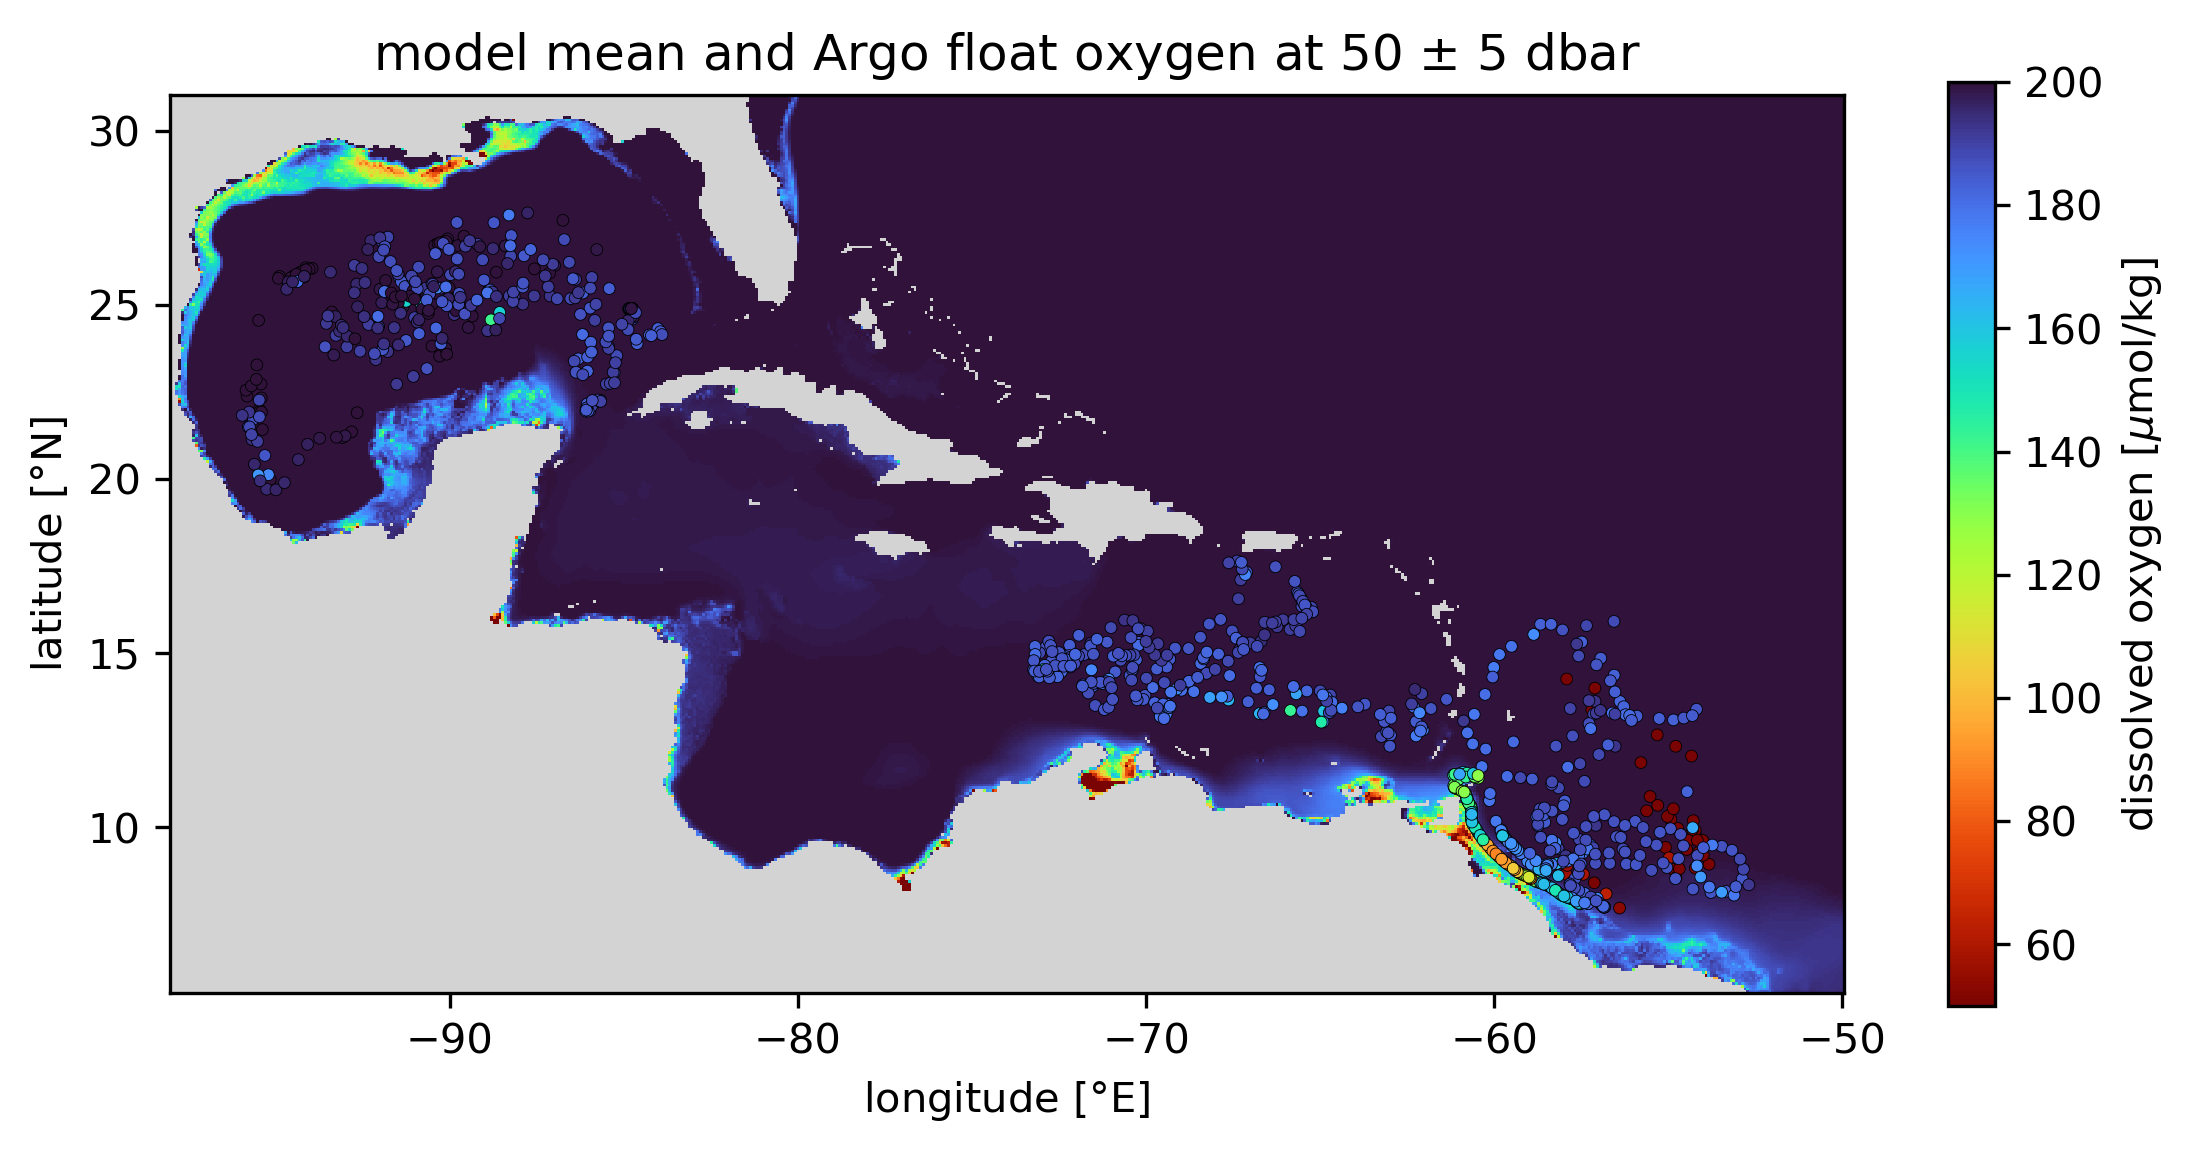

In [16]:
# nanmasked = mpl.colors.LinearSegmentedColormap.from_list("", ["whitesmoke","dimgray"]) #plt.get_cmap('Blues').copy()
# nanmasked.set_bad((0.3,0.3,0.3))
# nanmasked = plt.get_cmap('turbo_r').copy()
# nanmasked.set_bad('lightgrey')
test = (1e6*ds.o2.isel(zl=21,time=slice(1,None))).mean('time').compute()

fig, ax = plt.subplots(1, 1, figsize=(9,4),dpi=300)
test.plot(x='xh',y='yh',cmap=nanmasked,vmin=50,vmax=200,add_colorbar=False)
floats = [1901467,1901498,2904010,2904011,4903622,4903624,5906437,6902878,6902964,6902966,7901009]
colors = ['indianred','darkorange','goldenrod','gold','greenyellow','limegreen','lightseagreen','dodgerblue','blue','mediumpurple','magenta','palevioletred']
for i in range(len(floats)):
    data_path ='/scratch/gpfs/CDEUTSCH/wchu/CEFI-regional-MOM6/exps/NWA12.COBALT/ANALYSIS/obs/argo_'+str(floats[i])+'.nc'
    argo = xr.open_dataset(data_path,chunks='auto')
    colors = argo.Dissolved_Oxygen_original_.where(np.abs(argo.Pressure_original_-50)<=5)
    colors = colors.mean('N_SAMPLES')
    plt.scatter(argo.longitude-360,argo.latitude,s=8,c=colors,cmap='turbo_r',vmin=50,vmax=200,edgecolor='black',linewidths=0.2)
    # plt.scatter(argo.longitude-360,argo.latitude,s=8,color=colors[i],edgecolor='black',linewidths=0.2)
plt.colorbar(label='dissolved oxygen [$\mu$mol/kg]')
# plt.legend(labels=floats,fontsize=6,ncols=2,loc='lower left')
ax.set_xlabel('longitude [$\degree$E]')
ax.set_ylabel('latitude [$\degree$N]')
ax.set_title(r'model mean and Argo float oxygen at 50 $\pm$ 5 dbar')
ax.set_aspect('equal')

In [90]:
# argo.Pressure_original_.idxmax()#'N_SAMPLES')
# test = argo.Pressure_original_.idxmax('N_SAMPLES').astype('int').values
# colors = np.zeros(224)
# for i in range(224):
#     colors[i] = argo.Dissolved_Oxygen_original_[i,test[i]].values
# ind_x = xr.DataArray(list(range(224)), dims=['N_STATIONS'])
# ind_y = xr.DataArray(test, dims=['N_SAMPLES'])

# argo = argo.assign_coords({"N_SAMPLES": argo.N_SAMPLES, "N_STATIONS": argo.N_STATIONS})
# argo = argo.drop_vars(['SAMPLES','STATIONS'])

In [128]:
argo2.Dissolved_Oxygen_original_.max().values

array(195.7026, dtype=float32)